In [187]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sb
import matplotlib.pyplot as plt

The following function will combine the data of six months into one single csv file

In [189]:
path = '/Users/digi/Desktop/Winter-Sem-2022/Decision_Sciences/Project/cleaned_combined_csv.csv'

In [190]:
df = pd.read_csv(path)

In [191]:
df.head()

,Transaction Type,Shipment Date,Order Date,Quantity,Item Description,Asin,Hsn/sac,Sku,Product Tax Code,Ship To City,...,Tcs Cgst Amount,Tcs Sgst Rate,Tcs Sgst Amount,Tcs Utgst Rate,Tcs Utgst Amount,Tcs Igst Rate,Tcs Igst Amount,Payment Method Code,Credit Note No,Credit Note Date
0,Refund,24/02/22 13:04,24/02/22 9:36,1,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974N2YNT,61149090.0,TNSTshCom02 01 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,0.0,0.0,0.0,0,0,0.01,-9.04,CC,CN-6323,01/03/22 11:09
1,Refund,24/02/22 13:04,24/02/22 9:36,1,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974NPHYK,61149090.0,TNSTshCom02 03 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,0.0,0.0,0.0,0,0,0.01,-9.04,CC,CN-6324,01/03/22 11:20
2,Refund,19/02/22 14:04,19/02/22 12:03,1,Triumph Men s Sublimated Dri Fit Golf Tshirt G...,B08DYB12H3,61149090.0,Golf 09L,A_GEN_REDUCED,BENGALURU,...,0.0,0.0,0.0,0,0,0.01,-11.60,CC,CN-6327,01/03/22 14:30
3,Refund,19/02/22 14:04,19/02/22 12:03,1,Triumph Men s Sublimated Golf Tshirt White Size L,B08DYB63DB,61149090.0,Golf 032L,A_GEN_REDUCED,BENGALURU,...,0.0,0.0,0.0,0,0,0.01,-11.60,CC,CN-6327,01/03/22 14:30
4,Refund,24/02/22 13:04,23/02/22 22:42,1,Triumph Walking Running Sleeveless Tank Top Si...,B08K4QDX28,NaN,WarRunSinChMeDyedCombo01 05 S,A_GEN_SUPERREDUCED,BURDWAN,...,0.0,0.0,0.0,0,0,0.01,-5.23,GC,CN-6328,01/03/22 15:52


In [192]:
#df.drop(['Seller Gstin','Invoice Number','Invoice Date','Order Id','Shipment Id','Shipment Item Id',],axis=1)

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Hsn/sac'}>,
        <AxesSubplot:title={'center':'Ship To Postal Code'}>,
        <AxesSubplot:title={'center':'Invoice Amount'}>],
       [<AxesSubplot:title={'center':'Tax Exclusive Gross'}>,
        <AxesSubplot:title={'center':'Total Tax Amount'}>,
        <AxesSubplot:title={'center':'Igst Rate'}>,
        <AxesSubplot:title={'center':'Principal Amount'}>],
       [<AxesSubplot:title={'center':'Principal Amount Basis'}>,
        <AxesSubplot:title={'center':'Igst Tax'}>,
        <AxesSubplot:title={'center':'Tcs Cgst Rate'}>,
        <AxesSubplot:title={'center':'Tcs Cgst Amount'}>],
       [<AxesSubplot:title={'center':'Tcs Sgst Rate'}>,
        <AxesSubplot:title={'center':'Tcs Sgst Amount'}>,
        <AxesSubplot:title={'center':'Tcs Utgst Rate'}>,
        <AxesSubplot:title={'center':'Tcs Utgst Amount'}>],
       [<AxesSubplot:title={'center':'Tcs Igst Rate'}>,
        <AxesSubplot:title={

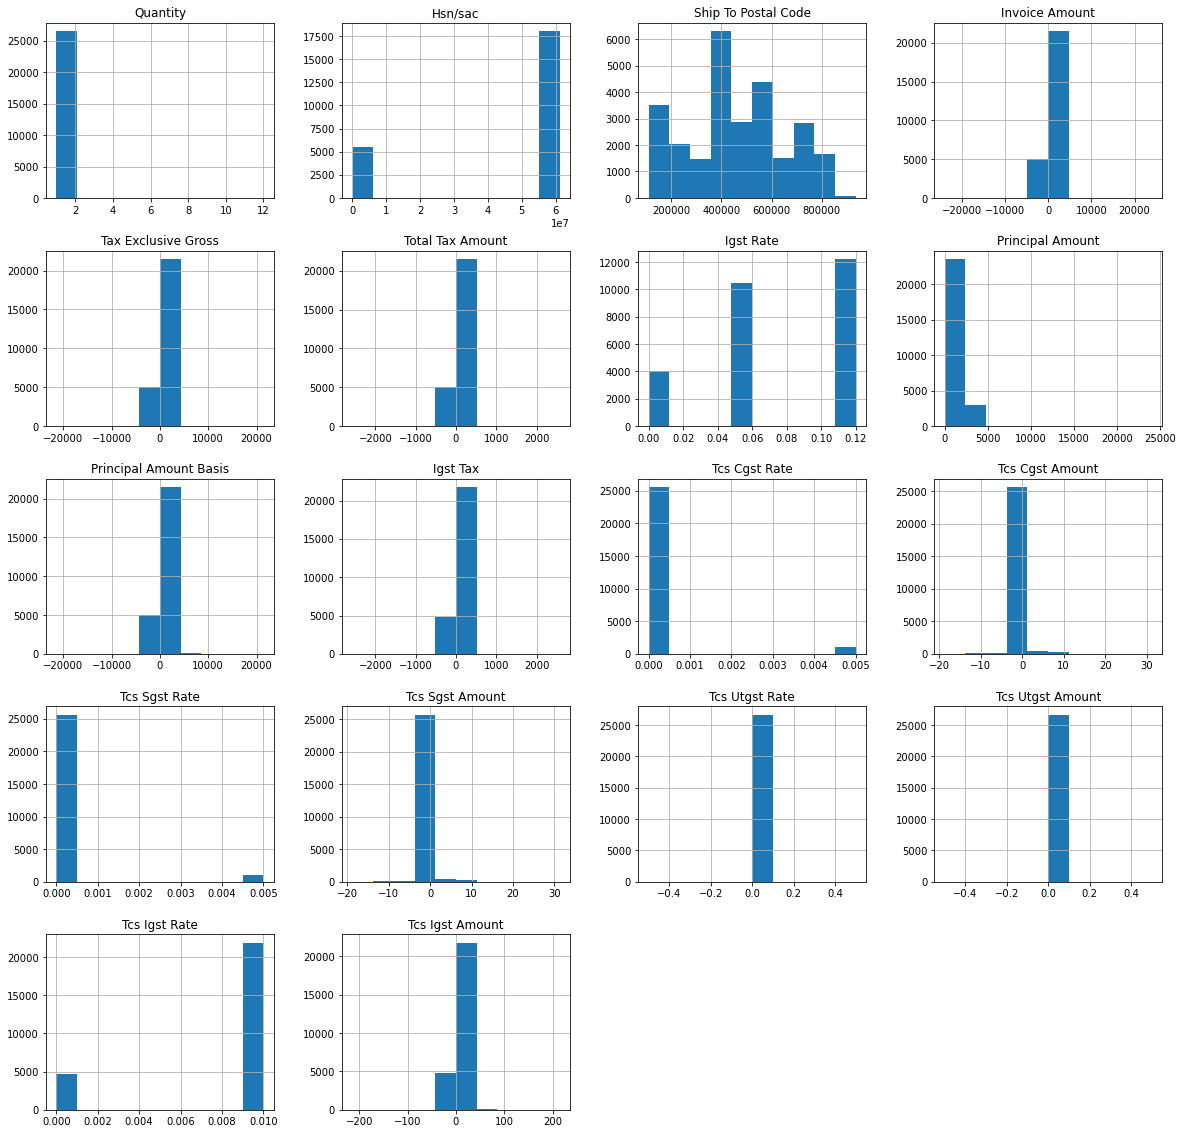

In [193]:
df.hist(figsize=(20,20))

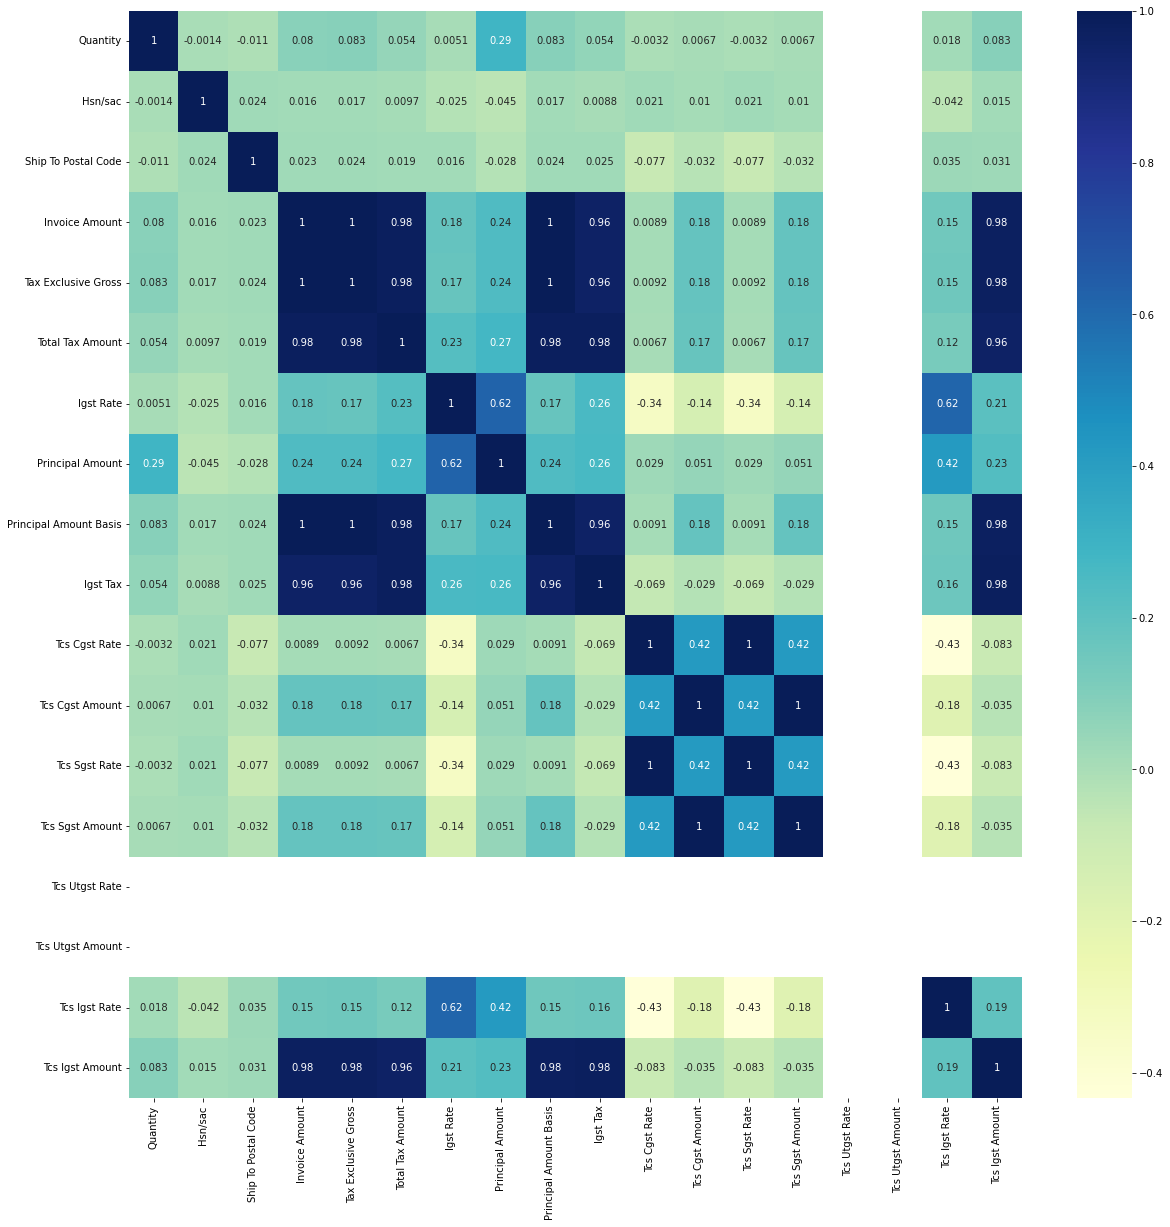

In [194]:
fig, ax = plt.subplots(figsize=(20,20))  
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
figsize=(20,20)

In [195]:
print(df.loc[:,'Transaction Type'].unique().sum())

RefundCancelShipmentFreeReplacement


In [196]:
df1 = df.drop(df[df['Transaction Type'].str.contains("Cancel") == True].index, inplace=True)

In [197]:
print(df.loc[:,'Transaction Type'].unique().sum())

RefundShipmentFreeReplacement


In [198]:
df1 = df.drop(df[df['Transaction Type'].str.contains("FreeReplacement") == True].index, inplace=True)

In [199]:
print(df.loc[:,'Transaction Type'].unique().sum())

RefundShipment


In [200]:
df.describe()

,Quantity,Hsn/sac,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount,Igst Rate,Principal Amount,Principal Amount Basis,Igst Tax,Tcs Cgst Rate,Tcs Cgst Amount,Tcs Sgst Rate,Tcs Sgst Amount,Tcs Utgst Rate,Tcs Utgst Amount,Tcs Igst Rate,Tcs Igst Amount
count,22928.000000,2.272200e+04,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.000000,22928.0,22928.0,22928.000000,22928.000000
mean,1.024075,4.671234e+07,458211.379361,695.645815,634.123780,61.523320,0.083568,1390.624302,635.023712,58.969714,0.000227,0.137498,0.000227,0.137498,0.0,0.0,0.009545,6.065966
std,0.267511,2.596758e+07,201146.658727,1529.884784,1372.675938,160.411205,0.038678,946.548891,1373.856485,157.953624,0.001042,1.492537,0.001042,1.492537,0.0,0.0,0.002084,13.522146
min,1.000000,6.114000e+03,110001.000000,-23988.000000,-21417.840000,-2570.160000,0.000000,499.000000,-21417.840000,-2570.160000,0.000000,-18.750000,0.000000,-18.750000,0.0,0.0,0.000000,-214.200000
25%,1.000000,6.114909e+07,321602.000000,522.000000,497.140000,24.860000,0.050000,699.000000,514.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000
50%,1.000000,6.114909e+07,431511.000000,749.000000,713.330000,35.670000,0.120000,1199.000000,713.330000,35.670000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,6.690000
75%,1.000000,6.114909e+07,600073.000000,1699.000000,1516.960000,182.040000,0.120000,1999.000000,1516.960000,160.610000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,13.830000
max,12.000000,6.114909e+07,855107.000000,23988.000000,21417.840000,2570.160000,0.120000,23988.000000,21417.840000,2570.160000,0.005000,31.250000,0.005000,31.250000,0.0,0.0,0.010000,214.200000


In [201]:
df.dtypes

Transaction Type           object
Shipment Date              object
Order Date                 object
Quantity                    int64
Item Description           object
Asin                       object
Hsn/sac                   float64
Sku                        object
Product Tax Code           object
Ship To City               object
Ship To State              object
Ship To Postal Code         int64
Invoice Amount            float64
Tax Exclusive Gross       float64
Total Tax Amount          float64
Igst Rate                 float64
Principal Amount            int64
Principal Amount Basis    float64
Igst Tax                  float64
Tcs Cgst Rate             float64
Tcs Cgst Amount           float64
Tcs Sgst Rate             float64
Tcs Sgst Amount           float64
Tcs Utgst Rate              int64
Tcs Utgst Amount            int64
Tcs Igst Rate             float64
Tcs Igst Amount           float64
Payment Method Code        object
Credit Note No             object
Credit Note Da

In [202]:
#df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])
#df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Credit Note Date'] = pd.to_datetime(df['Credit Note Date'])

In [203]:
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'],yearfirst=False, dayfirst=True)
df['Order Date'] = pd.to_datetime(df['Order Date'],yearfirst=False, dayfirst=True)
df['Credit Note Date'] = pd.to_datetime(df['Credit Note Date'],yearfirst=False, dayfirst=True)

In [204]:
df.shape

(22928, 30)

In [205]:
df.dtypes

Transaction Type                  object
Shipment Date             datetime64[ns]
Order Date                datetime64[ns]
Quantity                           int64
Item Description                  object
Asin                              object
Hsn/sac                          float64
Sku                               object
Product Tax Code                  object
Ship To City                      object
Ship To State                     object
Ship To Postal Code                int64
Invoice Amount                   float64
Tax Exclusive Gross              float64
Total Tax Amount                 float64
Igst Rate                        float64
Principal Amount                   int64
Principal Amount Basis           float64
Igst Tax                         float64
Tcs Cgst Rate                    float64
Tcs Cgst Amount                  float64
Tcs Sgst Rate                    float64
Tcs Sgst Amount                  float64
Tcs Utgst Rate                     int64
Tcs Utgst Amount

In [206]:
from datetime import datetime
df_dates = df
df_dates['weekday'] = df['Order Date'].apply(lambda time: time.dayofweek)
df_dates['Month'] = df['Order Date'].apply(lambda time: time.month)
df_dates['Hour'] = df['Order Date'].apply(lambda time: time.hour)

In [207]:
df_dates['weekday_cc'] = df['Credit Note Date'].apply(lambda time: time.dayofweek)
df_dates['Month_cc'] = df['Credit Note Date'].apply(lambda time: time.month)
df_dates['Hour_cc'] = df['Credit Note Date'].apply(lambda time: time.hour)
df_dates['weekday_ship'] = df['Shipment Date'].apply(lambda time: time.dayofweek)
df_dates['Month_ship'] = df['Shipment Date'].apply(lambda time: time.month)
df_dates['Hour_ship'] = df['Shipment Date'].apply(lambda time: time.hour)


In [208]:
df.shape

(22928, 39)

In [209]:
df.to_csv('df1.csv',index=False)

In [210]:
df_dates.head(20)

,Transaction Type,Shipment Date,Order Date,Quantity,Item Description,Asin,Hsn/sac,Sku,Product Tax Code,Ship To City,...,Credit Note Date,weekday,Month,Hour,weekday_cc,Month_cc,Hour_cc,weekday_ship,Month_ship,Hour_ship
0,Refund,2022-02-24 13:04:00,2022-02-24 09:36:00,1,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974N2YNT,61149090.0,TNSTshCom02 01 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,2022-03-01 11:09:00,3,2,9,1.0,3.0,11.0,3,2,13
1,Refund,2022-02-24 13:04:00,2022-02-24 09:36:00,1,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974NPHYK,61149090.0,TNSTshCom02 03 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,2022-03-01 11:20:00,3,2,9,1.0,3.0,11.0,3,2,13
2,Refund,2022-02-19 14:04:00,2022-02-19 12:03:00,1,Triumph Men s Sublimated Dri Fit Golf Tshirt G...,B08DYB12H3,61149090.0,Golf 09L,A_GEN_REDUCED,BENGALURU,...,2022-03-01 14:30:00,5,2,12,1.0,3.0,14.0,5,2,14
3,Refund,2022-02-19 14:04:00,2022-02-19 12:03:00,1,Triumph Men s Sublimated Golf Tshirt White Size L,B08DYB63DB,61149090.0,Golf 032L,A_GEN_REDUCED,BENGALURU,...,2022-03-01 14:30:00,5,2,12,1.0,3.0,14.0,5,2,14
4,Refund,2022-02-24 13:04:00,2022-02-23 22:42:00,1,Triumph Walking Running Sleeveless Tank Top Si...,B08K4QDX28,NaN,WarRunSinChMeDyedCombo01 05 S,A_GEN_SUPERREDUCED,BURDWAN,...,2022-03-01 15:52:00,2,2,22,1.0,3.0,15.0,3,2,13
5,Refund,2022-02-14 14:02:00,2022-02-14 08:30:00,1,Triumph Shiva T Shirt for Men Mahadev Printed ...,B08X2SW1ZD,61149090.0,CASUALJersShivaCombo02 36 XXL,A_GEN_SUPERREDUCED,BALLIA,...,2022-03-01 16:35:00,0,2,8,1.0,3.0,16.0,0,2,14
6,Refund,2022-02-11 13:23:00,2022-02-10 17:25:00,1,Triumph Men s Best Design Sublimated Tracksuit...,B082CZFF82,6114.0,TRKCombo01 15 XL,A_GEN_REDUCED,BHAGHA PURANA,...,2022-03-01 19:09:00,3,2,17,1.0,3.0,19.0,4,2,13
7,Refund,2022-02-23 14:03:00,2022-02-21 18:54:00,1,Triumph Men s Golf T Shirt Sports Short Sleeve...,B096K9CDXF,61149090.0,GolfCom03 27 XL,A_GEN_REDUCED,BARWALA,...,2022-03-02 04:30:00,0,2,18,2.0,3.0,4.0,2,2,14
8,Refund,2022-02-24 13:04:00,2022-02-23 17:15:00,1,Triumph Men s Sublimated Tracksuit Black Med...,B082D6M3Q9,6114.0,TRKCombo01 16 M,A_GEN_REDUCED,JAIPUR,...,2022-03-02 05:10:00,2,2,17,2.0,3.0,5.0,3,2,13
9,Refund,2022-02-23 14:03:00,2022-02-22 22:01:00,1,Triumph Mens Boys Independence Day India F...,B08F7Y1YXY,61149090.0,JKD0115 L,A_GEN_REDUCED,MANALI,...,2022-03-02 08:56:00,1,2,22,2.0,3.0,8.0,2,2,14


In [211]:
df_dates['Month'].unique()

array([ 2,  1,  3,  8, 12,  7, 10,  5,  9, 11,  6])

In [212]:
#plt.bar(df_dates['weekday'],df_dates['Principal Amount'])
#plt.show()

In [213]:
#plt.bar(df_dates['Hour'],df_dates['Principal Amount'])
#plt.show()

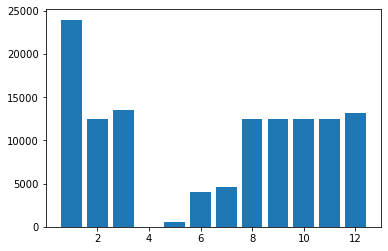

In [240]:
plt.bar(df_dates['Month'],df_dates['Principal Amount'])
plt.show()

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf=TfidfVectorizer(stop_words='english')

In [216]:
list_of_description = df['Item Description'].to_list()

In [241]:
temp=vectorizer_tfidf.fit_transform(list_of_description)
print('=> Feature Names: \n',vectorizer_tfidf.get_feature_names_out())
print('\n=> Term document matrix: \n',temp.shape)

=> Feature Names: 
 ['017caswalkingtigerblackl_black_large'
 '017caswalkingtigerblackxl_black_x' '02' '023' '03' '031' '033' '041'
 '046' '051' '071' '10' '100' '12' '13' '14' '15' '15aug' '15augwocombo'
 '15th' '18' '20' '2019' '2021' '22' '24' '26' '26th' '28' '2xl' '2xs'
 '30' '32' '34' '36' '37' '38' '3d' '3x110mm' '3xl' '40' '42' '44' '4xl'
 '5xl' '62' '62mm' '65' '65mm' '66mm' 'absorbent' 'accessories' 'acti'
 'active' 'activewe' 'activewear' 'activwear' 'adjustable' 'adul' 'adult'
 'aero' 'affordable' 'aluminium' 'anchors' 'anti' 'apparel' 'army' 'athle'
 'athletic' 'athletics' 'aug' 'august' 'azad' 'badminton' 'bam' 'bandhan'
 'basketball' 'beach' 'beard' 'bermuda' 'best' 'bhagat' 'bhole'
 'bholenath' 'bib' 'bicycle' 'bicycling' 'bike' 'biker' 'bikes' 'bikesize'
 'bikie' 'biking' 'bl' 'bla' 'blac' 'black' 'black_m' 'blue' 'bluesize'
 'bo' 'bodybuilding' 'bottoms' 'boy' 'boys' 'branded' 'breathable'
 'brother' 'brown' 'camouflage' 'cannibal' 'carbyne' 'casual' 'chamois'
 'champi

In [242]:
print(temp)

  (0, 462)	0.09059416005578921
  (0, 437)	0.1130009739302859
  (0, 125)	0.2702896631711124
  (0, 377)	0.1059757460963888
  (0, 406)	0.12932112250349004
  (0, 198)	0.22089887032812688
  (0, 180)	0.14869846241361082
  (0, 570)	0.1930335300034387
  (0, 268)	0.11279335117661193
  (0, 339)	0.13940065498425971
  (0, 421)	0.15056096460034657
  (0, 384)	0.1280014348831789
  (0, 513)	0.29459550530185064
  (0, 319)	0.13147328620010124
  (0, 438)	0.17482527332684675
  (0, 532)	0.7488229705595559
  (0, 552)	0.057125904598582085
  (1, 462)	0.09059416005578921
  (1, 437)	0.1130009739302859
  (1, 125)	0.2702896631711124
  (1, 377)	0.1059757460963888
  (1, 406)	0.12932112250349004
  (1, 198)	0.22089887032812688
  (1, 180)	0.14869846241361082
  (1, 570)	0.1930335300034387
  :	:
  (22926, 298)	0.2533548427634927
  (22926, 195)	0.28287210196055373
  (22926, 112)	0.2758407264796804
  (22926, 484)	0.30967596170484846
  (22926, 320)	0.21384109987814853
  (22926, 554)	0.2096095102165106
  (22926, 377)	0.1234

In [243]:
print(type(temp))

<class 'scipy.sparse.csr.csr_matrix'>


In [244]:
temp1 = pd.DataFrame(temp.toarray())

In [245]:
print(temp1)

       0    1    2    3    4    5    6    7    8    9    ...  627  628  629  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
22923  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22924  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22925  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22926  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22927  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       630       631  632  633  634  635       636 

In [246]:
result = pd.concat([df,temp1],axis=1)

In [247]:
result.head()

,Transaction Type,Shipment Date,Order Date,Quantity,Item Description,Asin,Hsn/sac,Sku,Product Tax Code,Ship To City,...,627,628,629,630,631,632,633,634,635,636
0,Refund,2022-02-24 13:04:00,2022-02-24 09:36:00,1.0,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974N2YNT,61149090.0,TNSTshCom02 01 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Refund,2022-02-24 13:04:00,2022-02-24 09:36:00,1.0,Triumph Tennis T Shirts for Men Sublimation Pr...,B0974NPHYK,61149090.0,TNSTshCom02 03 XL,A_GEN_SUPERREDUCED,HYDERABAD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Refund,2022-02-19 14:04:00,2022-02-19 12:03:00,1.0,Triumph Men s Sublimated Dri Fit Golf Tshirt G...,B08DYB12H3,61149090.0,Golf 09L,A_GEN_REDUCED,BENGALURU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Refund,2022-02-19 14:04:00,2022-02-19 12:03:00,1.0,Triumph Men s Sublimated Golf Tshirt White Size L,B08DYB63DB,61149090.0,Golf 032L,A_GEN_REDUCED,BENGALURU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Refund,2022-02-24 13:04:00,2022-02-23 22:42:00,1.0,Triumph Walking Running Sleeveless Tank Top Si...,B08K4QDX28,NaN,WarRunSinChMeDyedCombo01 05 S,A_GEN_SUPERREDUCED,BURDWAN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
result.shape

(26187, 676)

In [249]:
result = result.drop(['Shipment Date','Order Date','Asin','Sku','Product Tax Code','Credit Note No','Credit Note Date'],axis=1)

In [250]:
result = result.drop(['weekday_cc','Month_cc','Hour_cc'],axis=1)

In [251]:
result = result.drop(['Item Description'],axis=1)

In [252]:
result.shape

(26187, 665)

In [253]:
result.head()

,Transaction Type,Quantity,Hsn/sac,Ship To City,Ship To State,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount,Igst Rate,...,627,628,629,630,631,632,633,634,635,636
0,Refund,1.0,61149090.0,HYDERABAD,TELANGANA,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Refund,1.0,61149090.0,HYDERABAD,TELANGANA,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Refund,1.0,61149090.0,BENGALURU,KARNATAKA,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Refund,1.0,61149090.0,BENGALURU,KARNATAKA,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Refund,1.0,NaN,BURDWAN,WEST BENGAL,713361.0,-549.0,-522.86,-26.14,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
print(result['Transaction Type'].unique())
print(result['Ship To City'].unique())
print(result['Ship To State'].unique())
print(result['Payment Method Code'].unique())


['Refund' nan 'Shipment']
['HYDERABAD' 'BENGALURU' 'BURDWAN' ... 'ITARSI TOWN' 'VALANGAIMAN' 'ETAH']
['TELANGANA' 'KARNATAKA' 'WEST BENGAL' 'UTTAR PRADESH' 'PUNJAB' 'HARYANA'
 'RAJASTHAN' 'HIMACHAL PRADESH' 'TAMIL NADU' 'UTTARAKHAND'
 'ANDHRA PRADESH' 'GUJARAT' 'ODISHA' 'MAHARASHTRA' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'DELHI' 'MADHYA PRADESH' 'Maharashtra' 'GOA' 'MANIPUR'
 'CHANDIGARH' nan 'KERALA' 'CHHATTISGARH' 'JAMMU   KASHMIR'
 'Andaman and Nicobar Islands' 'TRIPURA' 'JHARKHAND' 'MIZORAM' 'Goa'
 'West Bengal' 'SIKKIM' 'HP' 'DADRA   NAGAR HAVELI'
 'ANDAMAN   NICOBAR ISLANDS' 'MEGHALAYA' 'West bengal' 'PUDUCHERRY' 'MH'
 'Telangana' 'Karnataka' 'Kerala' 'NAGALAND' 'LADAKH' 'AP' 'Uttar Pradesh'
 'Andhra Pradesh' 'Bihar' 'New Delhi' 'JH' 'Rajasthan' 'Orissa'
 'Madhya Pradesh' 'JK' 'KALKAJI New Delhi' 'UP' 'Tamilnadu' 'Haryana'
 'Uttarakhand' 'Delhi' 'KA' 'MP' 'karnataka' 'MZ' 'Andhra pradesh' 'Assam'
 'Rajashthan' 'Manipur' 'Tamil Nadu' 'ML' 'Chhattisgarh' 'LAKSHADWEEP'
 'Gujarat' 'Ja

In [255]:
#result.isna().sum()

In [256]:
result.isnull().sum()

Transaction Type    3259
Quantity            3259
Hsn/sac             3465
Ship To City        3259
Ship To State       3259
                    ... 
632                 3259
633                 3259
634                 3259
635                 3259
636                 3259
Length: 665, dtype: int64

In [257]:
result.dropna(inplace=True)

In [258]:
result.isnull().sum()

Transaction Type    0
Quantity            0
Hsn/sac             0
Ship To City        0
Ship To State       0
                   ..
632                 0
633                 0
634                 0
635                 0
636                 0
Length: 665, dtype: int64

In [259]:
print(result['Transaction Type'].unique())
print(result['Ship To City'].unique())
print(result['Ship To State'].unique())
print(result['Payment Method Code'].unique())

['Refund' 'Shipment']
['HYDERABAD' 'BENGALURU' 'BALLIA' ... 'Sout west Delhi' 'KADEGAON'
 'Suroth  Karauli']
['TELANGANA' 'KARNATAKA' 'UTTAR PRADESH' 'PUNJAB' 'HARYANA' 'RAJASTHAN'
 'HIMACHAL PRADESH' 'TAMIL NADU' 'UTTARAKHAND' 'ANDHRA PRADESH'
 'WEST BENGAL' 'GUJARAT' 'ODISHA' 'MAHARASHTRA' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'DELHI' 'MADHYA PRADESH' 'Maharashtra' 'GOA' 'MANIPUR'
 'CHANDIGARH' 'KERALA' 'CHHATTISGARH' 'JAMMU   KASHMIR'
 'Andaman and Nicobar Islands' 'TRIPURA' 'JHARKHAND' 'MIZORAM' 'Goa'
 'West Bengal' 'SIKKIM' 'HP' 'DADRA   NAGAR HAVELI'
 'ANDAMAN   NICOBAR ISLANDS' 'MEGHALAYA' 'West bengal' 'PUDUCHERRY' 'MH'
 'Telangana' 'Karnataka' 'Kerala' 'NAGALAND' 'LADAKH' 'AP' 'Uttar Pradesh'
 'Andhra Pradesh' 'Bihar' 'New Delhi' 'JH' 'Rajasthan' 'Orissa'
 'Madhya Pradesh' 'JK' 'KALKAJI New Delhi' 'UP' 'Tamilnadu' 'Haryana'
 'Uttarakhand' 'Delhi' 'KA' 'MP' 'karnataka' 'MZ' 'Andhra pradesh' 'Assam'
 'Rajashthan' 'Manipur' 'Tamil Nadu' 'ML' 'Chhattisgarh' 'LAKSHADWEEP'
 'Gujarat'

In [260]:
result = result.astype({"Transaction Type":'category'})

In [261]:
result.dtypes

Transaction Type    category
Quantity             float64
Hsn/sac              float64
Ship To City          object
Ship To State         object
                      ...   
632                  float64
633                  float64
634                  float64
635                  float64
636                  float64
Length: 665, dtype: object

In [262]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [263]:
result['Transaction Type'] = le.fit_transform(result['Transaction Type'])

In [264]:
result.head()

,Transaction Type,Quantity,Hsn/sac,Ship To City,Ship To State,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount,Igst Rate,...,627,628,629,630,631,632,633,634,635,636
0,0,1.0,61149090.0,HYDERABAD,TELANGANA,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,61149090.0,HYDERABAD,TELANGANA,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,61149090.0,BENGALURU,KARNATAKA,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,61149090.0,BENGALURU,KARNATAKA,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1.0,61149090.0,BALLIA,UTTAR PRADESH,277001.0,-699.0,-665.71,-33.29,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
result['Ship To City'] = le.fit_transform(result['Ship To City'])

In [266]:
result['Ship To State'] = le.fit_transform(result['Ship To State'])
result['Payment Method Code'] = le.fit_transform(result['Payment Method Code'])


In [267]:
result.head()

,Transaction Type,Quantity,Hsn/sac,Ship To City,Ship To State,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount,Igst Rate,...,627,628,629,630,631,632,633,634,635,636
0,0,1.0,61149090.0,861,72,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,61149090.0,861,72,500055.0,-949.0,-903.81,-45.19,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,61149090.0,239,36,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,61149090.0,239,36,560066.0,-1299.0,-1159.82,-139.18,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1.0,61149090.0,176,79,277001.0,-699.0,-665.71,-33.29,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
X = result.drop(['Transaction Type'],axis=1)
y = result['Transaction Type']

In [270]:
print(X.shape)
print(y.shape)

(19487, 664)
(19487,)


In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [272]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

/Users/digi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=42)

In [273]:
y_pred = model.predict(X_test)

/Users/digi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [274]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 1.0
